C:\Users\Saiganesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Saiganesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


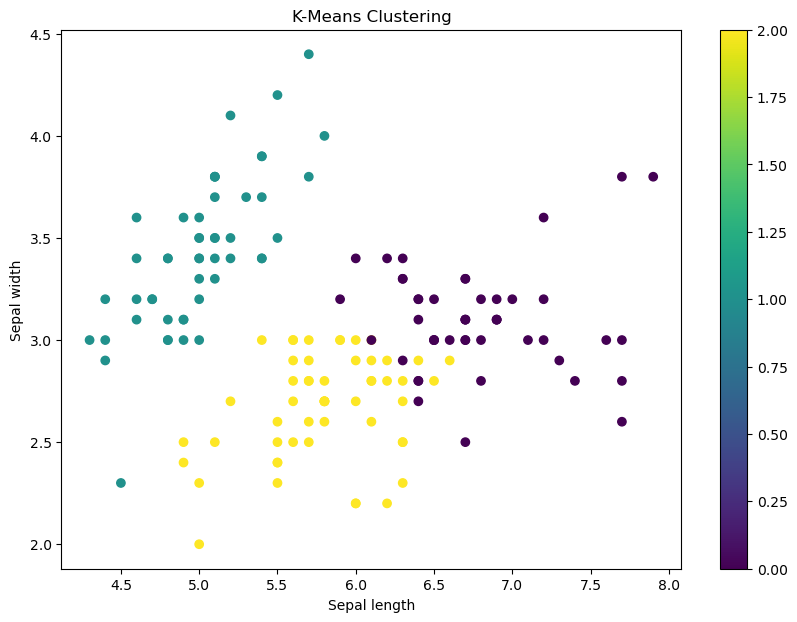

K-Means Clustering:
Silhouette Score: 0.4599
Calinski-Harabasz Score: 241.9044



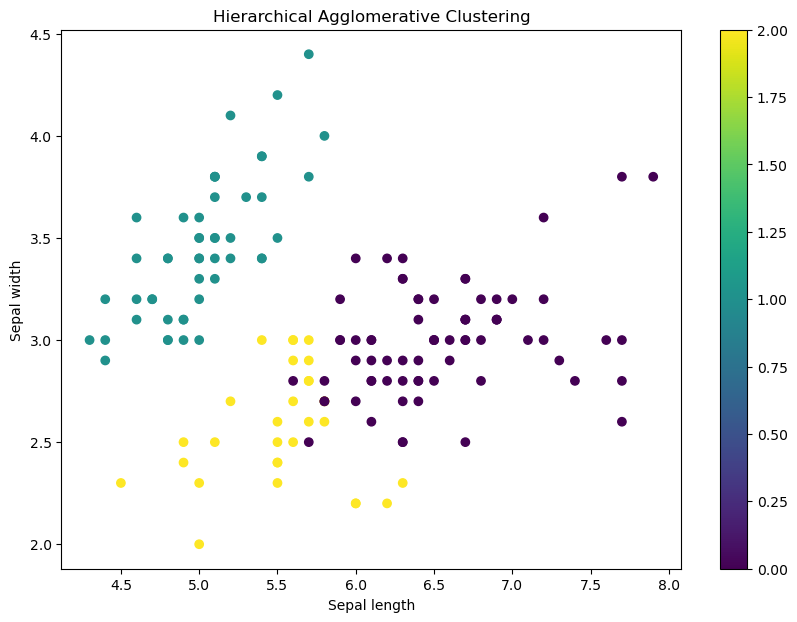

Hierarchical Agglomerative Clustering:
Silhouette Score: 0.4467
Calinski-Harabasz Score: 222.7192



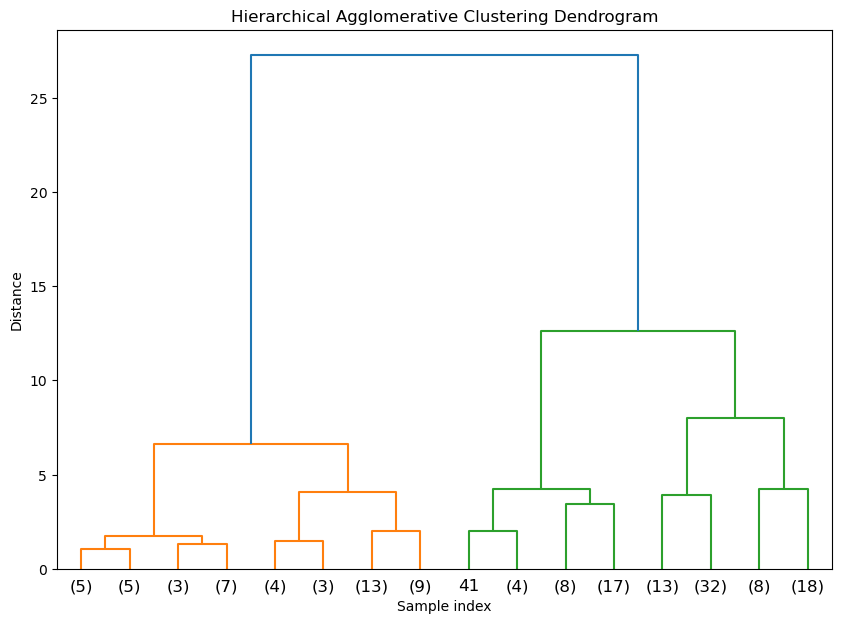

C:\Users\Saiganesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


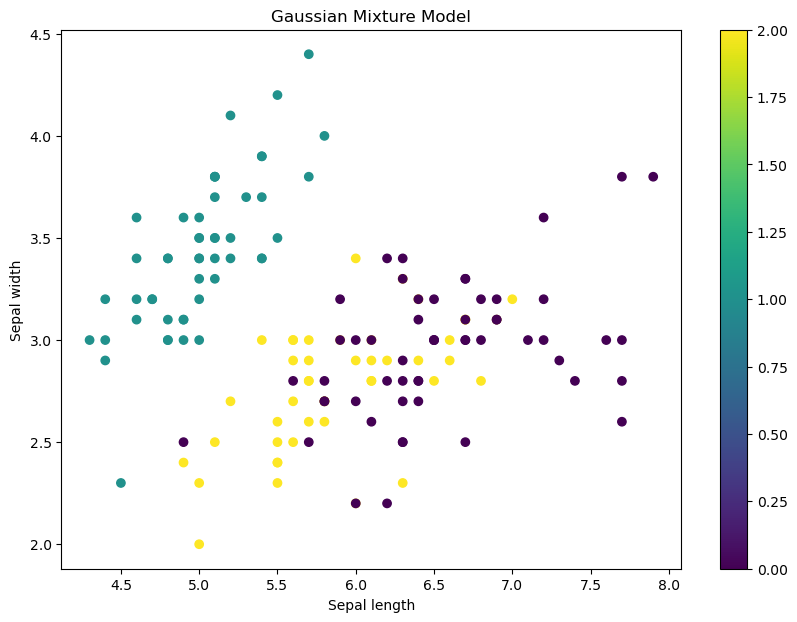

Gaussian Mixture Model:
Silhouette Score: 0.3742
Calinski-Harabasz Score: 187.7745



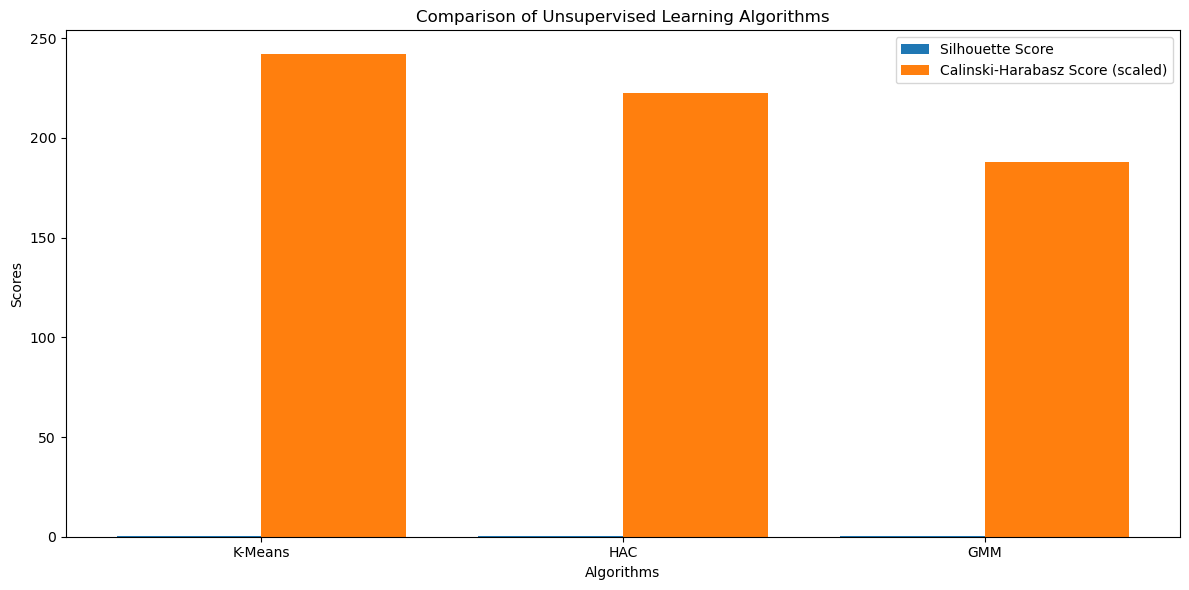

Final Comparison:
K-Means:
  Silhouette Score: 0.4599
  Calinski-Harabasz Score: 241.9044

HAC:
  Silhouette Score: 0.4467
  Calinski-Harabasz Score: 222.7192

GMM:
  Silhouette Score: 0.3742
  Calinski-Harabasz Score: 187.7745



In [2]:
#Aim: Compare various unsupervised learning algorithms using appropriate data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot results
def plot_results(X, labels, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, calinski_harabasz

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_results(X, kmeans_labels, 'K-Means Clustering')

kmeans_silhouette, kmeans_ch = evaluate_clustering(X_scaled, kmeans_labels)
print("K-Means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {kmeans_ch:.4f}\n")

# 2. Hierarchical Agglomerative Clustering (HAC)
hac = AgglomerativeClustering(n_clusters=3)
hac_labels = hac.fit_predict(X_scaled)
plot_results(X, hac_labels, 'Hierarchical Agglomerative Clustering')

hac_silhouette, hac_ch = evaluate_clustering(X_scaled, hac_labels)
print("Hierarchical Agglomerative Clustering:")
print(f"Silhouette Score: {hac_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {hac_ch:.4f}\n")

# Plot dendrogram for HAC
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Agglomerative Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

hac_full = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac_full.fit(X_scaled)
plot_dendrogram(hac_full, truncate_mode='level', p=3)

# 3. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plot_results(X, gmm_labels, 'Gaussian Mixture Model')

gmm_silhouette, gmm_ch = evaluate_clustering(X_scaled, gmm_labels)
print("Gaussian Mixture Model:")
print(f"Silhouette Score: {gmm_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {gmm_ch:.4f}\n")

# Compare results
algorithms = ['K-Means', 'HAC', 'GMM']
silhouette_scores = [kmeans_silhouette, hac_silhouette, gmm_silhouette]
ch_scores = [kmeans_ch, hac_ch, gmm_ch]

plt.figure(figsize=(12, 6))
x = range(len(algorithms))
plt.bar([i - 0.2 for i in x], silhouette_scores, width=0.4, label='Silhouette Score', align='center')
plt.bar([i + 0.2 for i in x], ch_scores, width=0.4, label='Calinski-Harabasz Score (scaled)', align='center')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Unsupervised Learning Algorithms')
plt.xticks(x, algorithms)
plt.legend()
plt.tight_layout()
plt.show()

print("Final Comparison:")
for alg, silhouette, ch in zip(algorithms, silhouette_scores, ch_scores):
    print(f"{alg}:")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Calinski-Harabasz Score: {ch:.4f}")
    print()